# 서울시 코로나19 확진자 현황

In [1]:
import sys
import numpy as np
import pandas as pd
import time
import json
import re

# A Fast, Extensible Progress Bar for Python and CLI
from tqdm import tqdm

# Statistical data visualization using matplotlib.
import seaborn as sns

# Python Data. Leaflet.js Maps.
import folium

# matplotlib: plotting with Python.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Set the matplotlib color cycle using a seaborn palette.
sns.set_palette('pastel')

# plot outputs appear and be stored within the notebook.
%matplotlib inline

# A module for finding, managing, and using fonts across platforms.
mpl.font_manager._rebuild()
sorted([f.name for f in mpl.font_manager.fontManager.ttflist if f.name.startswith('Malgun')])

mpl.rc('axes', unicode_minus=False)

if sys.platform.startswith('darwin'):
    mpl.rc('font', family='AppleGothic')
elif sys.platform.startswith('win32'):
    mpl.rc('font', family='Malgun Gothic')

# An importlib package installable from any python version
import importlib
import modules.fs as fs

## 서울시 전체 현황

In [2]:
# 상태 및 여행력 분석
si_status = fs.read_csv('./data/si_status.csv')

si_status = si_status.T
si_status.rename(columns={
    0: '상태'
}, inplace=True)

si_status

,상태
퇴원,6620
사망,93
입원,2253


In [3]:
si_travel = fs.read_csv('./data/si_travel.csv')

si_travel = si_travel.T
si_travel.rename(columns={
    0: '여행력'
}, inplace=True)

si_travel

,여행력
집,8417
여행,549


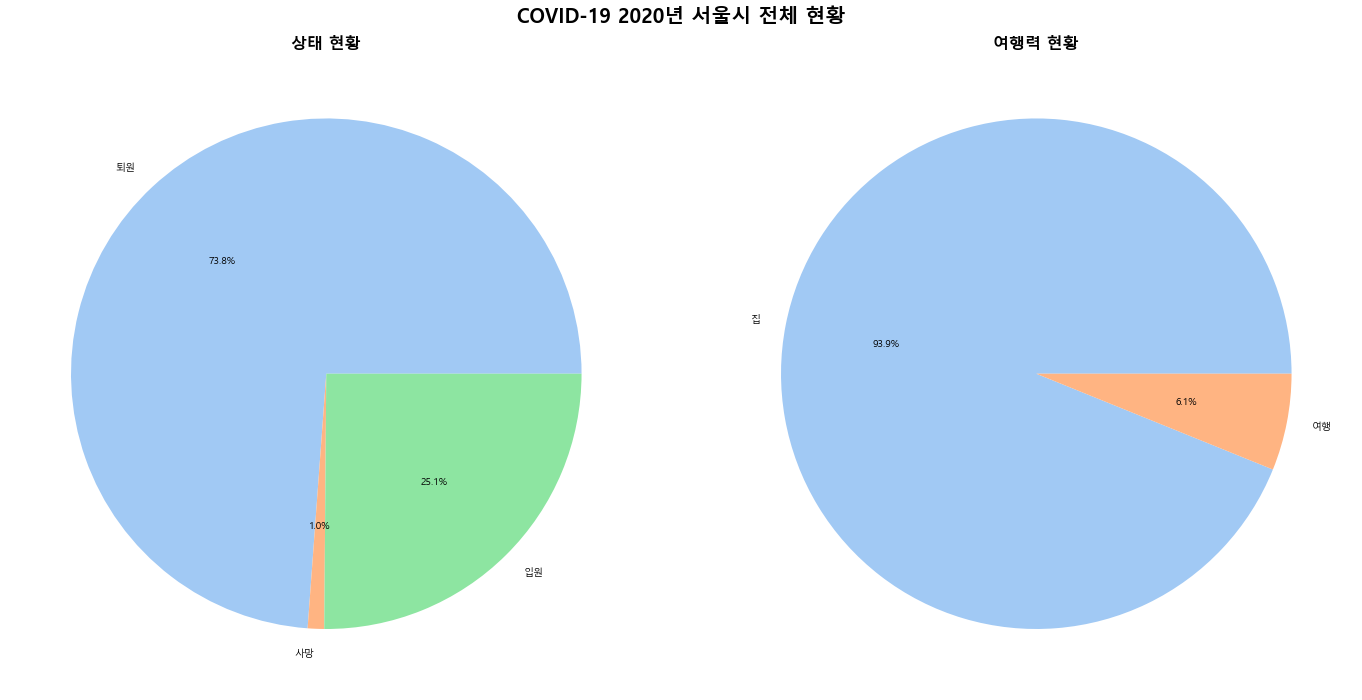

In [4]:
fig = plt.figure(figsize=(20, 10))

# 상태
ax1 = plt.subplot(1, 2, 1)
ax1.pie(si_status['상태'], labels=si_status.index.to_list(), autopct='%1.1f%%')
ax1.set_title('상태 현황', fontsize=16, fontweight='bold')

# 여행력
ax2 = plt.subplot(1, 2, 2)
ax2.pie(si_travel['여행력'], labels=si_travel.index.to_list(), autopct='%1.1f%%')
ax2.set_title('여행력 현황', fontsize=16, fontweight='bold')

# 설정
fig.suptitle('COVID-19 2020년 서울시 전체 현황', fontsize=20, fontweight='bold')
fig.tight_layout(pad=2)

# 출력
plt.savefig('./assets/img/si_status_travel.png', format='png', dpi=300)
plt.show()

In [5]:
# 확진일 일별 분석
si_daily = fs.read_csv('./data/si_daily.csv')

si_daily['날짜'] = pd.to_datetime(si_daily['날짜'], format='%Y-%m-%d')
si_daily['년'] = si_daily['날짜'].dt.year
si_daily['월'] = si_daily['날짜'].dt.month
si_daily['일'] = si_daily['날짜'].dt.day

si_daily.head()

,날짜,퇴원,사망,입원,년,월,일
0,2020-01-24,1.0,NaN,NaN,2020,1,24
1,2020-01-30,3.0,NaN,NaN,2020,1,30
2,2020-01-31,3.0,NaN,NaN,2020,1,31
3,2020-02-02,1.0,NaN,NaN,2020,2,2
4,2020-02-05,2.0,NaN,NaN,2020,2,5


In [6]:
# 확진일 월별 분석
si_monthly = fs.read_csv('./data/si_monthly.csv')

si_monthly['날짜'] = pd.to_datetime(si_monthly['날짜'], format='%Y-%m-%d')
si_monthly['년'] = si_monthly['날짜'].dt.year
si_monthly['월'] = si_monthly['날짜'].dt.month
si_monthly['일'] = si_monthly['날짜'].dt.day

si_monthly.head(1)

,날짜,퇴원,사망,입원,년,월,일
0,2020-01-31,7,NaN,NaN,2020,1,31


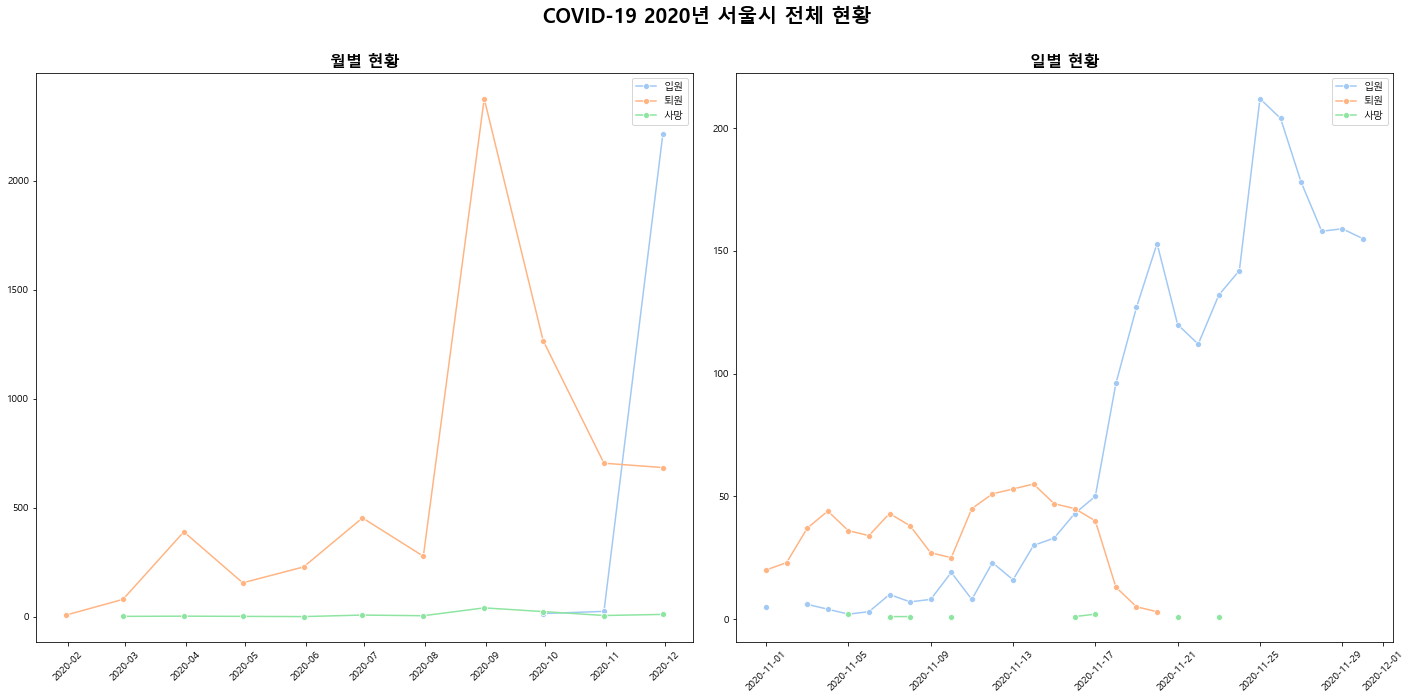

In [7]:
fig = plt.figure(figsize=(20, 10))

# 월별
ax4 = plt.subplot(1, 2, 1)
ax4.tick_params(axis='x', rotation=90)

data = si_monthly

sns.lineplot(data=data, x='날짜', y='입원', label='입원', marker='o')
sns.lineplot(data=data, x='날짜', y='퇴원', label='퇴원', marker='o')
sns.lineplot(data=data, x='날짜', y='사망', label='사망', marker='o')

ax4.set_title('월별 현황', fontsize=16, fontweight='bold')
ax4.set(xlabel=None, ylabel=None)
ax4.tick_params(axis='x', rotation=45)
ax4.legend()

# 일별
ax3 = plt.subplot(1, 2, 2)
ax3.tick_params(axis='x', rotation=90)

data = si_daily.query("월 in ['11', '12']")

sns.lineplot(data=data, x='날짜', y='입원', label='입원', marker='o')
sns.lineplot(data=data, x='날짜', y='퇴원', label='퇴원', marker='o')
sns.lineplot(data=data, x='날짜', y='사망', label='사망', marker='o')

ax3.set_title('일별 현황', fontsize=16, fontweight='bold')
ax3.set(xlabel=None, ylabel=None)
ax3.tick_params(axis='x', rotation=45)
ax3.legend()

# 설정
fig.suptitle('COVID-19 2020년 서울시 전체 현황', fontsize=20, fontweight='bold')
fig.tight_layout(pad=2)

# 출력
plt.savefig('./assets/img/si_trend.png', format='png', dpi=300)
plt.show()

## 지역구 분석

In [8]:
# 상태 분석
gu_status = fs.read_csv('./data/gu_status.csv')
gu_status.rename(columns={'Unnamed: 0': '지역'}, inplace=True)
gu_status['확진자'] = gu_status['퇴원'] + gu_status['사망'] + gu_status['입원']
gu_status.head(1)

,지역,퇴원,사망,입원,확진자
0,강남구,390.0,4.0,126.0,520.0


In [9]:
# 여행력 분석
gu_travel = fs.read_csv('./data/gu_travel.csv')
gu_travel.rename(columns={'Unnamed: 0': '지역'}, inplace=True)
gu_travel.head(1)

,지역,집,여행
0,강남구,464,56.0


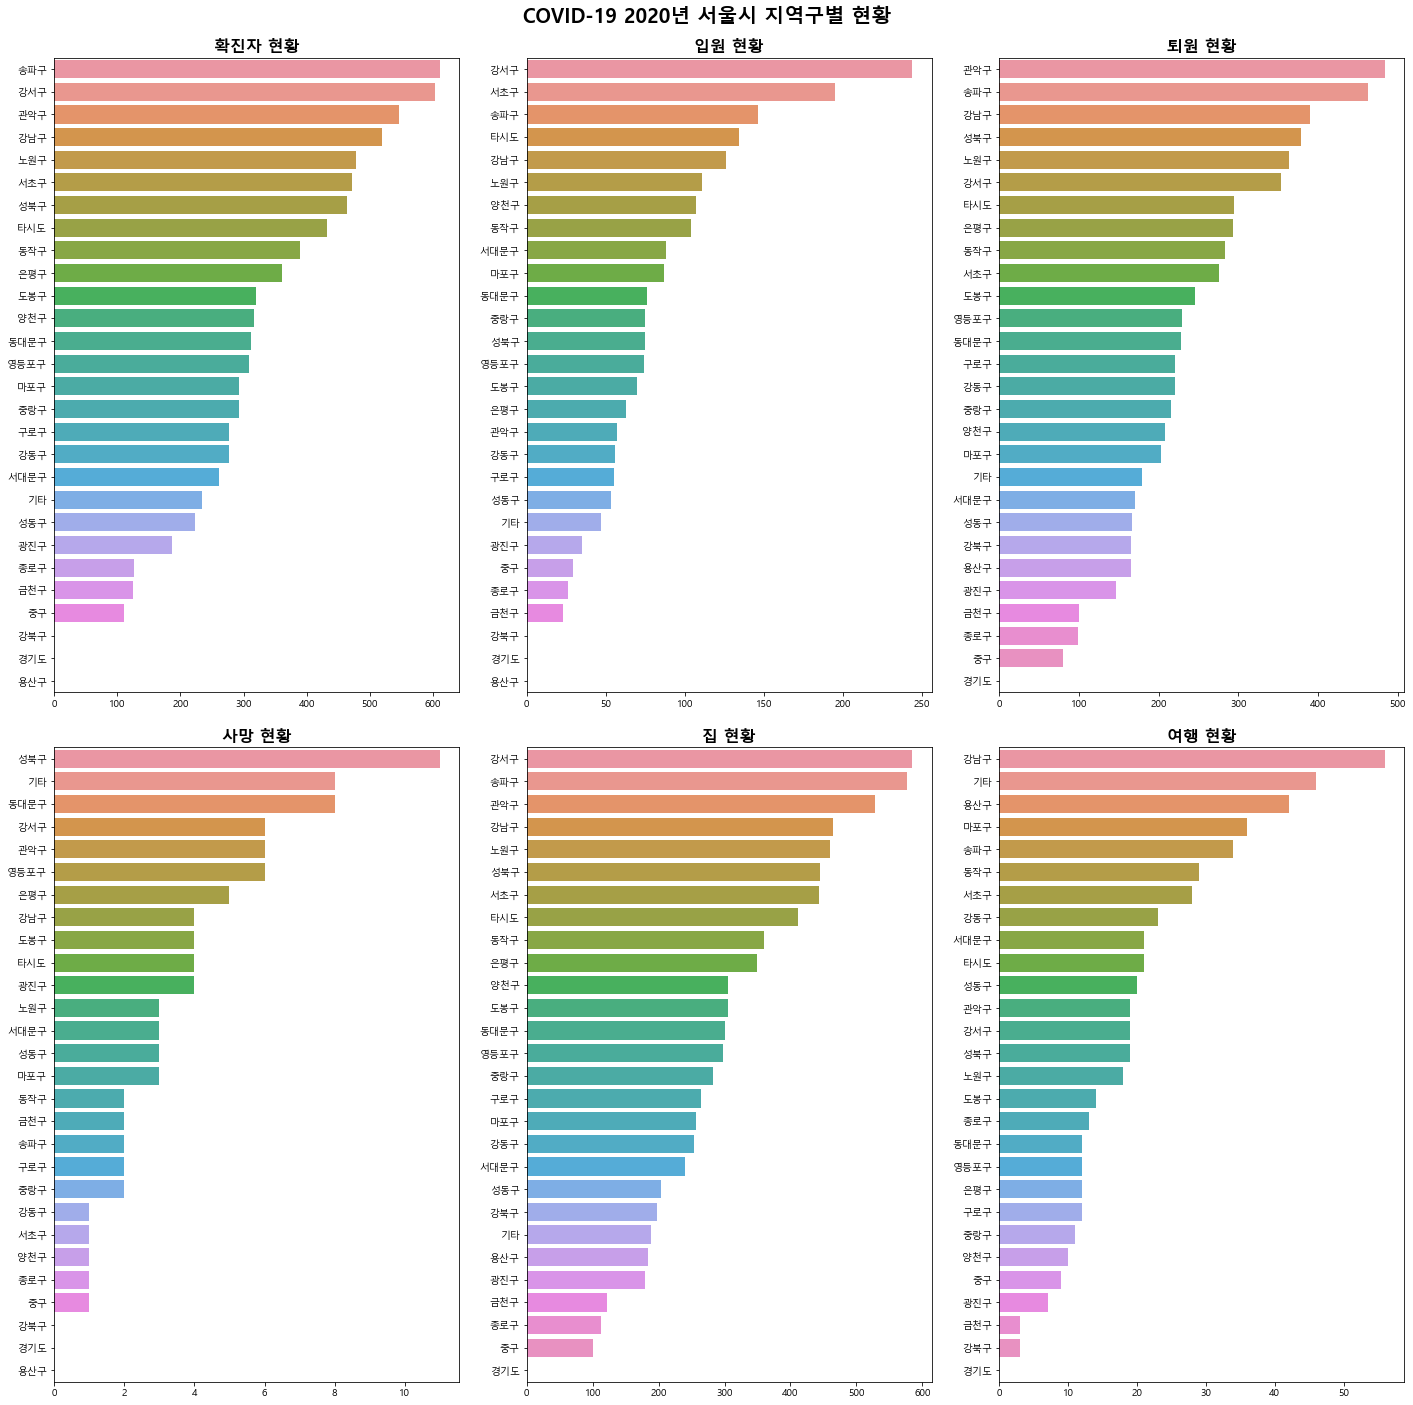

In [10]:
fig = plt.figure(figsize=(20, 20))

# 확진자
ax1 = plt.subplot(2, 3, 1)
sns.barplot(x='확진자', y='지역', data=gu_status.sort_values(by='확진자', ascending=False))
ax1.set_title('확진자 현황', fontsize=16, fontweight='bold')
ax1.set(xlabel=None, ylabel=None)

# 입원
ax2 = plt.subplot(2, 3, 2)
sns.barplot(x='입원', y='지역', data=gu_status.sort_values(by='입원', ascending=False))
ax2.set_title('입원 현황', fontsize=16, fontweight='bold')
ax2.set(xlabel=None, ylabel=None)

# 퇴원
ax3 = plt.subplot(2, 3, 3)
sns.barplot(x='퇴원', y='지역', data=gu_status.sort_values(by='퇴원', ascending=False))
ax3.set_title('퇴원 현황', fontsize=16, fontweight='bold')
ax3.set(xlabel=None, ylabel=None)

# 사망
ax4 = plt.subplot(2, 3, 4)
sns.barplot(x='사망', y='지역', data=gu_status.sort_values(by='사망', ascending=False))
ax4.set_title('사망 현황', fontsize=16, fontweight='bold')
ax4.set(xlabel=None, ylabel=None)

# 집
ax5 = plt.subplot(2, 3, 5)
sns.barplot(x='집', y='지역', data=gu_travel.sort_values(by='집', ascending=False))
ax5.set_title('집 현황', fontsize=16, fontweight='bold')
ax5.set(xlabel=None, ylabel=None)

# 여행
ax6 = plt.subplot(2, 3, 6)
sns.barplot(x='여행', y='지역', data=gu_travel.sort_values(by='여행', ascending=False))
ax6.set_title('여행 현황', fontsize=16, fontweight='bold')
ax6.set(xlabel=None, ylabel=None)

# 설정
fig.suptitle('COVID-19 2020년 서울시 지역구별 현황', fontsize=20, fontweight='bold')
fig.tight_layout(pad=2)

# 출력
plt.savefig('./assets/img/gu_status_travel.png', format='png', dpi=300)
plt.show()

In [11]:
# 확진일 월별 분석
gu_monthly = fs.read_csv('./data/gu_monthly.csv')
gu_monthly.fillna(0, inplace=True)

gu_monthly['확진자'] = gu_monthly['퇴원'] + gu_monthly['사망'] + gu_monthly['입원']

gu_monthly.head(1)

,지역,날짜,퇴원,사망,입원,확진자
0,강남구,2020-02-29,8.0,0.0,0.0,8.0


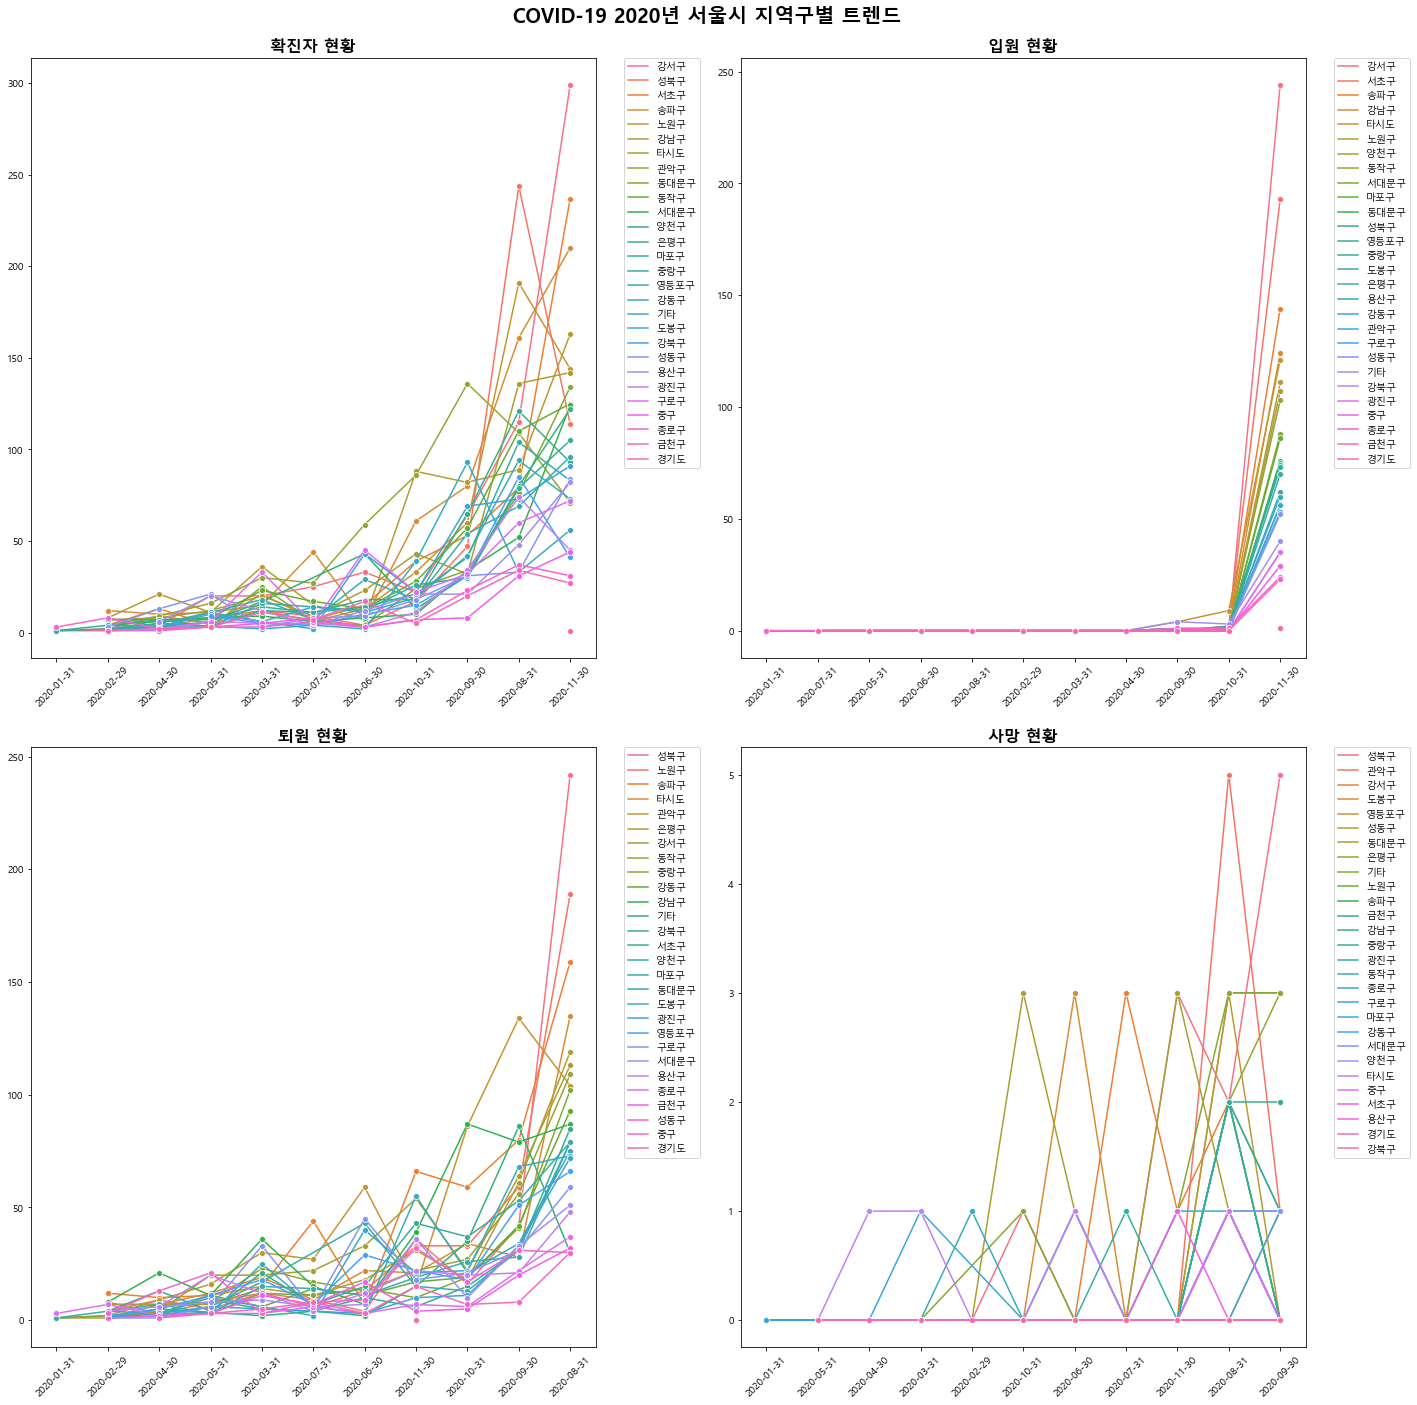

In [12]:
fig = plt.figure(figsize=(20, 20))

# 월별: 확진자
ax1 = plt.subplot(2, 2, 1)
ax1.tick_params(axis='x', rotation=90)
ax1.invert_xaxis()

sns.lineplot(x='날짜', y='확진자', hue='지역', marker='o', data=gu_monthly.sort_values(by='확진자', ascending=False))

ax1.set_title('확진자 현황', fontsize=16, fontweight='bold')
ax1.set(xlabel=None, ylabel=None)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 월별: 입원
ax2 = plt.subplot(2, 2, 2)
ax2.tick_params(axis='x', rotation=90)
ax2.invert_xaxis()

sns.lineplot(x='날짜', y='입원', hue='지역', marker='o', data=gu_monthly.sort_values(by='입원', ascending=False))

ax2.set_title('입원 현황', fontsize=16, fontweight='bold')
ax2.set(xlabel=None, ylabel=None)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 월별: 퇴원
ax3 = plt.subplot(2, 2, 3)
ax3.tick_params(axis='x', rotation=90)
ax3.invert_xaxis()

sns.lineplot(x='날짜', y='퇴원', hue='지역', marker='o', data=gu_monthly.sort_values(by='퇴원', ascending=False))

ax3.set_title('퇴원 현황', fontsize=16, fontweight='bold')
ax3.set(xlabel=None, ylabel=None)
ax3.tick_params(axis='x', rotation=45)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 월별: 사망
ax4 = plt.subplot(2, 2, 4)
ax4.tick_params(axis='x', rotation=90)
ax4.invert_xaxis()

sns.lineplot(x='날짜', y='사망', hue='지역', marker='o', data=gu_monthly.sort_values(by='사망', ascending=False))

ax4.set_title('사망 현황', fontsize=16, fontweight='bold')
ax4.set(xlabel=None, ylabel=None)
ax4.tick_params(axis='x', rotation=45)
ax4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 설정
fig.suptitle('COVID-19 2020년 서울시 지역구별 트렌드', fontsize=20, fontweight='bold')
fig.tight_layout(pad=2)

# 출력
plt.savefig('./assets/img/gu_trend.png', format='png', dpi=300)
plt.show()